# Surface plots #

This notebook is used create surface plots to visualize the brain activation for each of the 5states.


**Last update:** 02.12.2022

### Step 0: Loading libraries ###

In [1]:
import numpy as np
from nilearn import plotting
from nilearn import surface
import matplotlib.pyplot as plt
%matplotlib inline

/home/iga/miniconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Step 1: Loading data ###

In [2]:
#Loading data
mean_bs_5 = np.load('/home/iga/BrainStates/brain-states/Analysis/data/5_states/fixed_mean_bs_5.npy')
print(mean_bs_5.shape)

(5, 400)


### Step 2: Creating a function to plot surface plots 

In [3]:
def surface_plots_schaefer400(parcel_values, cmap='RdBu_r', vmin=None, vmax=None, title=None):

    n_parcels = 400
    if len(parcel_values) != n_parcels:
        raise ValueError(
            f"The mumber of parcels values ({len(parcel_values)}) does't match the number of parcels in a parcellarion ({n_parcels})"
        )

    # Freesurfer annotation file
    schaefer400_atlas_lh = surface.load_surf_data('/home/iga/BrainStates/brain-states/Analysis/support/schaeffer_400_parcellation/surface/lh.Schaefer2018_400Parcels_7Networks_order.annot')
    schaefer400_atlas_rh = surface.load_surf_data('/home/iga/BrainStates/brain-states/Analysis/support/schaeffer_400_parcellation/surface/rh.Schaefer2018_400Parcels_7Networks_order.annot')


    # Surface mesh
    lh_pial = surface.load_surf_mesh('/home/iga/BrainStates/brain-states/Analysis/support/schaeffer_400_parcellation/surface/lh.pial')
    lh_curv = surface.load_surf_data('/home/iga/BrainStates/brain-states/Analysis/support/schaeffer_400_parcellation/surface/lh.curv')
    rh_pial = surface.load_surf_mesh('/home/iga/BrainStates/brain-states/Analysis/support/schaeffer_400_parcellation/surface/rh.pial')
    rh_curv = surface.load_surf_data('/home/iga/BrainStates/brain-states/Analysis/support/schaeffer_400_parcellation/surface/rh.curv')


    scheafer_val_left = parcel_values[:200]
    scheafer_val_right = parcel_values[200:]

    scheafer_val_left_ins = np.insert(scheafer_val_left, 0, 0, axis=0)
    scheafer_val_right_ins = np.insert(scheafer_val_right, 0, 0, axis=0)

    plots = {"Left lateral": [lh_pial, lh_curv, scheafer_val_left_ins, "left", "lateral", schaefer400_atlas_lh],
             "Left medial": [lh_pial, lh_curv, scheafer_val_left_ins, "left", "medial", schaefer400_atlas_lh],
             "Right lateral": [rh_pial, rh_curv, scheafer_val_right_ins, "right", "lateral", schaefer400_atlas_rh],
             "Right medial": [rh_pial, rh_curv, scheafer_val_right_ins, "right", "medial", schaefer400_atlas_rh]}

    for plot, parameter in plots.items():
        fig = plotting.plot_surf(parameter[0], parameter[2][parameter[5]], bg_map=parameter[1], 
                     hemi=parameter[3], view=parameter[4], 
                     cmap=cmap, 
                     bg_on_data=True,
                     colorbar=True,      
                     vmin=vmin,
                     vmax=vmax,
                     title=f"{title}{plot}",
                     darkness=1)
                    
        fig.savefig(f'/home/iga/BrainStates/brain-states/Analysis/Figures/5_states/surface/surface_plots_{title}{plot}.png', dpi=300, bbox_inches='tight')

### Step 3: Plotting activation on the surface plots ###

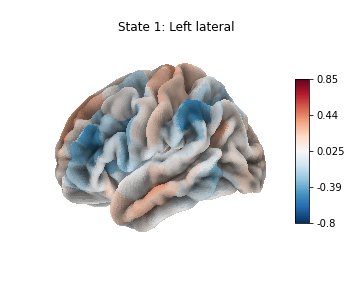

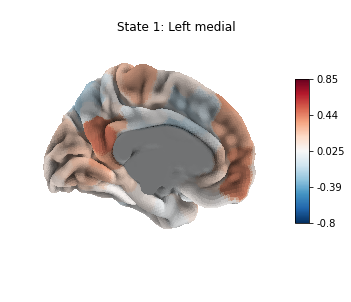

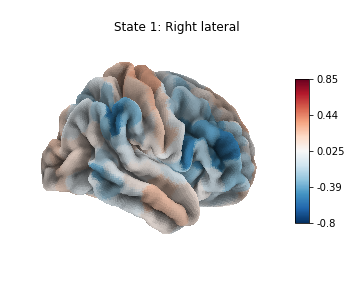

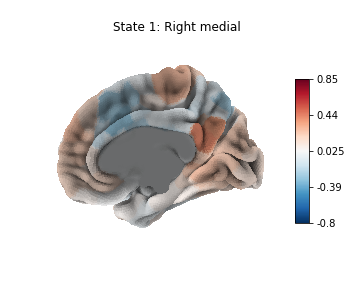

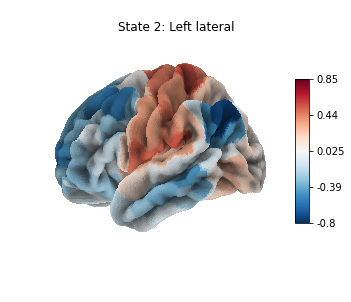

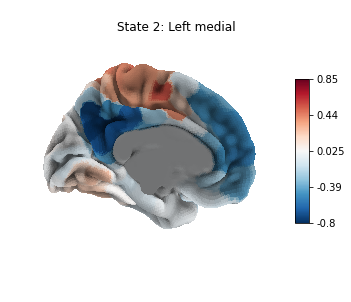

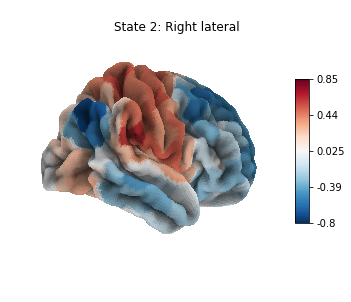

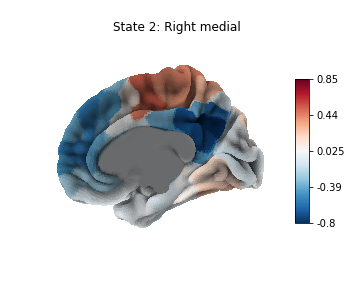

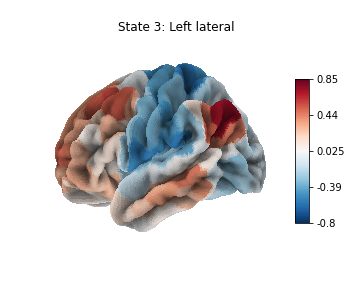

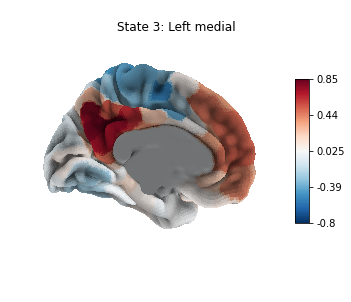

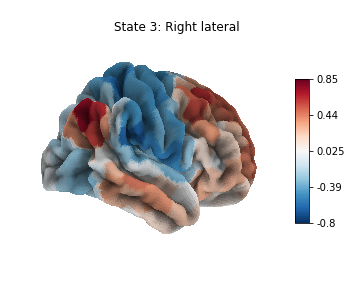

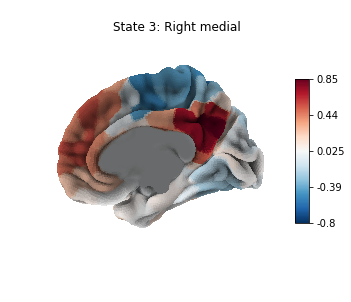

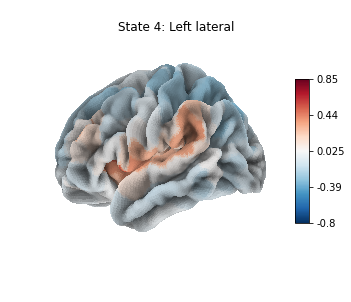

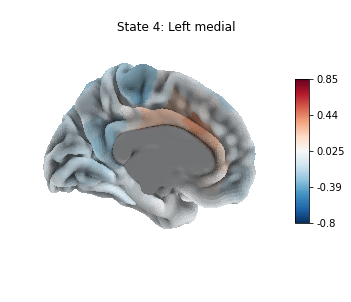

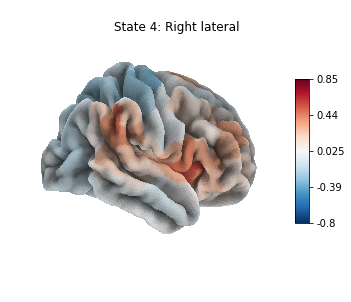

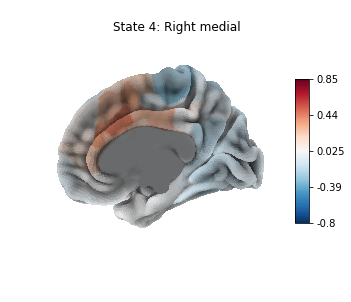

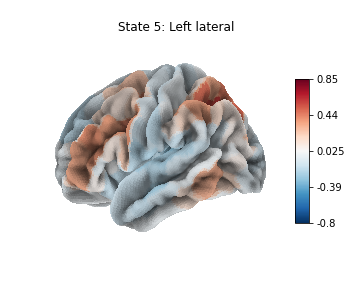

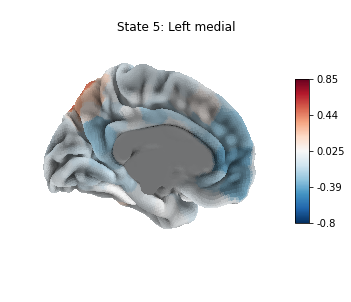

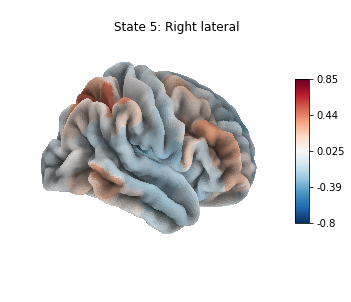

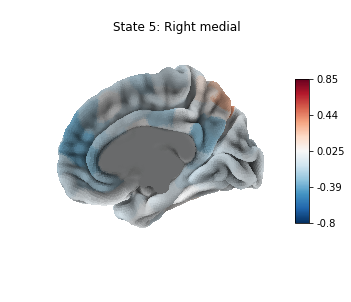

In [4]:
vmin = np.min(mean_bs_5)
vmax = np.max(mean_bs_5)

for i in range(5):
    surface_plots_schaefer400(mean_bs_5[i], vmin=vmin, vmax=vmax, title=f"State {i+1}: ")